<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/NeuralProhet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Time Series Forecasting: For Predictive Analytics and Anomaly Detection
# NeuralProphet

Many of you may have heard about the open-source Prophet module for time series forecasting. Prophet sets a paradigm in time series forecasting community. Its interpretability of the forecasts as well as interactive user-interface have been welcomed by many professionals. I covered Prophet In the series “Business Forecasting with Facebook's Prophet”. Now, with the release of the NeuralProphet module, I am even more excited to write the tutorial series to introduce NeuralProphet to you. If you have never used Prophet before, you can click “Business Forecasting with Facebook's Prophet”.

You may wonder what's new in NeuralProphet, or even, what’s new in Prophet. In the tutorial series, I will start with a re-cap of Prophet and introduce NeuralProphet. Then I will add modules in a sequence. Neural Prophet inherits the trend, seasonality, holidays & events of Prophet, and expands to the auto-regressive, lagged regressors, and future regressors components. Each component can be experimented and optimized as I will show you in my tutorials.

I organize the tutorial series into digestible sizes like the following

* **Tutorial I**: Trend + seasonality + holidays & events
* **Tutorial II**: Trend + seasonality + holidays & events + auto-regressive (AR) + lagged regressors + future regressors

By following the tutorial series, you will be able to build NeuralProphet models easily and interpret your model outcomes comfortably. I incorporate the theoretical background in the context whenever it is needed. If you have built models with Prophet before, you may even consider refreshing your models with NeuralProphet which offers many compelling features.

In this first post, you will learn:

- Why Prophet?
- Why NeuralProphet?
- Google Colab and installation of NeuralProphet
- The components in NeuralProphet
- Understanding the trend module
- Understanding the seasonality module
- The trend + seasonality modules
- The trend + seasonality + holidays & events modules

Throughout the tutorials, you will see the use of out-of-time performance metrics repeatedly. This will help you to be well-grounded in the discipline of time series modeling development. The Python notebooks are available via the link in each tutorial for you to download and modify. The code for this tutorial is here.

So why wait? Let’s start.

## **Why Prophet?**

Prophet has gained popularity for its effectiveness and interpretable forecasts. Let’s see its noticeable features. The first feature is additivity. It decomposes time series data into three main components: trend, seasonality, and holidays & events. This framework of additive components makes the model transparent and the forecasts explainable. Prophet adopts the generalized additive model (GAM) originally invented by Trevor Hastie and Robert Tibshirani in 1986. In an era of model explainability in data science, this framework makes it accessible to users with varying expertise in industry and academia. The second feature of Prophet is its automation in detecting changepoints. Changepoints are points where the time series exhibits abrupt changes in its trajectory and exist in almost any time series. The automation helps capture sudden shifts in the data and adjusts the model accordingly. In Chapter 5: Change Point Detection in Time Series, we will learn more about the algorithms for change point detection.

The third feature of Prophet is its flexibility in customizing changepoints, seasonality, and holidays. Users can incorporate their prior knowledge into the model, and control the model parameters for fine-tuning. The fourth feature of Prophet is uncertainty or prediction intervals for the forecast in addition to point estimates at the mean. The prediction intervals enable users to assess the risks and identify anomalies.

## **Why NeuralProphet?**

NeuralProphet inherits the framework of Prophet and advances it with many plausible features. One noticeable enhancement is its auto-regressive (AR) module. If you come from the ARIMA (Auto-Regressive Integration Moving-Average) forecasting methods and use Prophet, you may have found a gap between the GAM framework of Prophet and the auto-regressive thinking in ARIMA. Prophet does not specify auto-regressive terms as regressors like ARIMA to model the patterns. In recent time series modeling literature, there are many works to apply neural networks to model time series. One successful work is AR-Net, a neural network for auto-regressive terms. NeuralProphet includes AR-net as a new module. With the AR module, NeuralProphet has reported greater predictability over Prophet. Further, because neural networks can include hidden layers, they can capture more complex patterns than the classic ARIMA-type models. In the second tutorial, I will explain the neural networks of AR-Net and the AR-module of NeuralProphet, and experiment with different neural network structures.

A time series is called a univariate time series if it uses only the information from the target variable itself to forecast the future. A time series becomes multivariate when it has other variables, called covariates, to forecast the future values of the target variable. NeuralProphet adds the lagged regressors and future regressors modules that allow for other covariates. This will be explained in great detail in my second tutorial.

NeuralProphet uses uncertainty estimation techniques such as quantile regression or conformal prediction, to better model the prediction intervals around the mean predicted values. Its approach to modeling seasonality is more sophisticated. It uses Fourier term seasonality at different hourly, weekly, daily, and yearly periods.

Several engineering advantages in NeuralProphet are also worth noting. NeuralProphet is built on top of PyTorch, a popular deep-learning library. This allows software developers to scale PyTorch. NeuralProphet is designed to be extensible through its additive modules. This enables software engineers to integrate additional functionalities or customize the model according to their requirements. NeuralProphet was tested to deliver equivalent or superior quality to Prophet (Triebe et al. (2021)).

## **The components of NeuralProphet**

Prophet’s GAM framework includes the trend, seasonality, and holidays & events as three components. NeuralProphet expands it to include the auto-regressive component, the lagged regressors, and the future regressors modules, as formulated in the equation:

    Y(t) = T(t) + S(t) + E(t) + A(t) + L(t) + F(t)*

where

* T(t) = Trend at time t
* S(t) = Seasonal effects at time t
* E(t) = Event and holiday effects at time t
* A(t) = Auto-regression effects at time t based on past observations
* L(t) = Regression effects at time t for lagged observations of exogenous variables
* F (t) = Regression effects at time t for future-known exogenous variables

All these modules can be individually configured. We can build many candidate models by testing the modules to select the best performing model.

Before we build NeuralProphet models, Let’s talk about the hardware and environment.

## **Using Google Colab**

I recommend Google Colab as your NeuralProphet project, if you do not have GPUs on your local machine, Google Colab is a good choice. See “Start using Google Colab Free GPU” on how to set up a GPU environment for your Google Colab notebooks.

Installation of NeuralProphet

Following the standard installation pip install NeuralProphet to install NeuralProphet.

In [ ]:
%%capture
!pip install neuralprophet

# neuralprophet does not work with colab unless numpy1.23.5: https://github.com/googlecolab/colabtools/issues/3752
#!pip uninstall numpy
#!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5

In [ ]:
from neuralprophet import set_random_seed
set_random_seed(0)

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

In [ ]:
%%time

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.75,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : '#0099e6',
         'axes.titlesize'       : 8.5,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

CPU times: user 252 ms, sys: 457 µs, total: 252 ms
Wall time: 265 ms


<Figure size 640x480 with 0 Axes>

In [ ]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Scripts/Modern Time Series - Book/Chaper 3: NeuralProhet/"
os.chdir(folder_script)

In [ ]:
#path = '/content/gdrive/My Drive/data/time_series'
data = pd.read_csv('bike_sharing_daily.csv')
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Let’s plot the bike-sharing count. We observe the demand increases in the second year, and there is a seasonal pattern

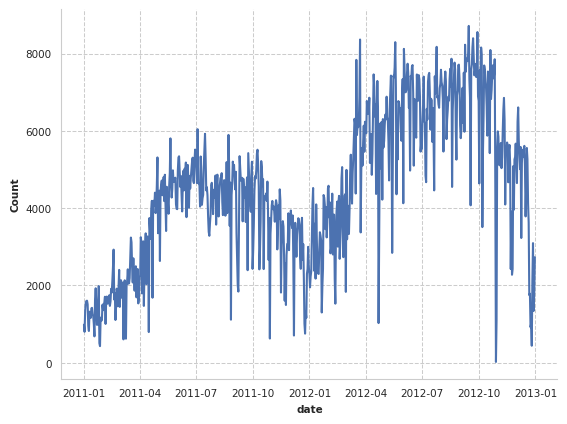

In [ ]:
# convert string to datetime64
data["ds"] = pd.to_datetime(data["dteday"])

# create line plot of sales data
plt.plot(data['ds'], data["cnt"])
plt.xlabel("date")
plt.ylabel("Count")
plt.show()

In [ ]:
df = data[['ds','cnt']]
df.columns = ['ds','y']

We will do a very minimal data preparation for modeling. Same as Prophet, NeuralProphet requires the column names to be “ds” and “y”.

- df = data[['ds','cnt']]
- df.columns = ['ds','y']
Let’s build a simple NeuralProphet model with all the default parameters. The goal here is to orient ourselves with its basic code and output interface.